## CS 570
## Assignment 3
### Nipuni Senani de Silva rammini

a)
These are the steps need to be completed for this part.

1.

Load keras.datasets.fashion_mnist data into train_images train_labels test_images test_labels

2.

Implement an MLP architecture that can be trained on the fashion dataset. Select the number of layers and number of nodes in each layer according to your consideration. The input and output layers’ nodes need to be determined based on the dataset. Please make sure that your network architecture is DIFFERENT from the architecture used in the sample code provided with this assignment.

3.

Train the network on the training samples. Your program should print the training accuracy for each epoch. Remember ‘accuracy’ on a data set is defined by the percentage of correct detection out of total number of samples.

4.

Validate the trained model using the test data. Report the final test accuracy. No marks will be deducted if your test accuracy is slightly lower than the best test accuracy, but it should be at least 70%. Please remember that the sample code provided does not calculate the accuracy on the test data set. This part is left for the students to implement.

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.14.0


In [ ]:
# Check if a GPU is available
if tf.test.is_gpu_available():
    print("GPU is available.")
    print("GPU name:", tf.test.gpu_device_name())
    print("GPU device:", tf.test.gpu_device_name())
else:
    print("No GPU is available.")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


GPU is available.
GPU name: /device:GPU:0
GPU device: /device:GPU:0


# Part a)

In [ ]:
# load digit dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# load CIFAR10 dataset
#(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
#train_images, test_images = train_images / 255.0, test_images / 255.0


print("Shape of the training dataset, number of images and resolution:", train_images.shape)
print("All distinct training labels:", np.unique(train_labels))

Shape of the training dataset, number of images and resolution: (60000, 28, 28)
All distinct training labels: [0 1 2 3 4 5 6 7 8 9]


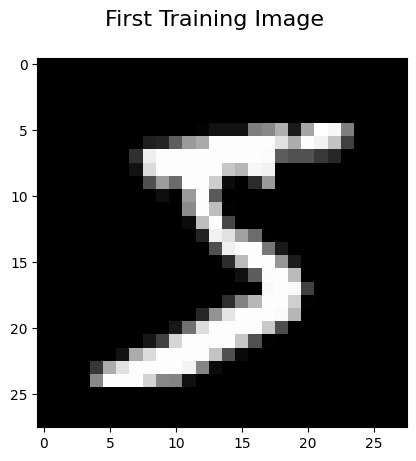

First training label:  5


In [ ]:
plt.figure()
plt.imshow(train_images[0], cmap='gray')
#plt.colorbar()
plt.grid(False)
plt.suptitle('First Training Image', fontsize=16)
plt.show()
print("First training label: ", train_labels[0])

In [ ]:
#Model old
with tf.device("/GPU:0"):
  model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28, 28)),       #input_shape=(28, 28) for digit
      keras.layers.Dense(512, activation='relu'),
      keras.layers.Dense(64, activation='sigmoid'),
      keras.layers.Dense(10),

  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  early_stopping_cb = keras.callbacks.EarlyStopping(patience=100,restore_best_weights=True)

  history = model.fit(train_images, train_labels,
                      epochs=1000,
                      validation_split=0.1,
                      callbacks=[early_stopping_cb]
                      )

Epoch 1/1000
1688/1688 [==============================] - 9s 5ms/step - loss: 0.9285 - accuracy: 0.7306 - val_loss: 0.4460 - val_accuracy: 0.8813
Epoch 2/1000
1688/1688 [==============================] - 10s 6ms/step - loss: 0.4784 - accuracy: 0.8600 - val_loss: 0.3694 - val_accuracy: 0.8890
Epoch 3/1000
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4467 - accuracy: 0.8677 - val_loss: 0.3698 - val_accuracy: 0.8918
Epoch 4/1000
1688/1688 [==============================] - 6s 3ms/step - loss: 0.4096 - accuracy: 0.8789 - val_loss: 0.3132 - val_accuracy: 0.9085
Epoch 5/1000
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3850 - accuracy: 0.8845 - val_loss: 0.3048 - val_accuracy: 0.9132
Epoch 6/1000
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3924 - accuracy: 0.8815 - val_loss: 0.3457 - val_accuracy: 0.8992
Epoch 7/1000
1688/1688 [==============================] - 6s 3ms/step - loss: 0.4031 - accuracy: 0.8787 - val_loss: 0.3151 

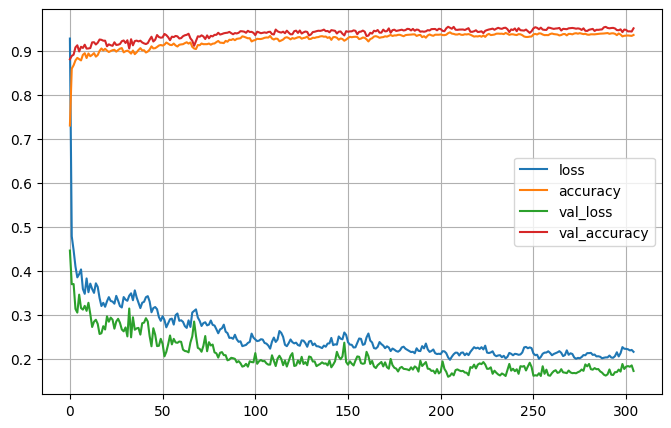

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#learning curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca() # set the vertical range to [0-1]
plt.show()

In [ ]:
# Validate the trained model using the test data

score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20328281819820404
Test accuracy: 0.9422000050544739


# Part b)

**Hyperparameter tuning **is a technique to select the (almost) best model architecture for a machine learning problem. In this case, we will try to select the best combination for 3 parameters which are the **number of hidden layers, the number of nodes in each hidden layer, and the activation function**. For our case, we will select between two different choices for each hyperparameter and try all combinations of hyperparameter values. Finally, we will select the hyperparameter combination that returns the best validation accuracy. You need to complete the below tasks.

1.


Consider that your model has three hyperparameters such as the number of hidden layers, the number of nodes in each hidden layer, and the activation function. Each of the hyperparameters can take two values which are (3, 4), (64, 128), (‘sigmoid’, ‘relu’) respectively. Implement the grid search algorithm discussed in the class to select each possible hyperparameter combination at a time, define an MLP model with the selected hyperparameter combination, and train the model. The mentioned steps need to be performed in a loop to iterate over each possible hyperparameter combination (in this case the number of possible combinations is 8 ). Remember to split the train_images into training and
validation sets so that you can compute validation accuracy (no cross validation is needed for this assignment for each iteration of the loop Your program must print each combination of hyperparameters and its validation accuracy. Marks will be deducted if this information is not displayed. Selection of hyperparameter combinations, generating the MLP architecture, training the network, and reporting validation accuracy should be done programmatically using loops. Do not use hardcoded hyperparameter combinations and hardcoded network models.




In [ ]:
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [ ]:
"""
Here when using the grid search , Since it takes lot of computation
time to get epochs that model coverges,  I fixed the maximum number of epochs to 20.
"""
# grid boundares
layers = [3, 4]
no_nodes = [64, 128]
activation_fns = ['sigmoid', 'relu']

model_accuracies = {}
best_model = None
best_model_no = 0
best_accuracy = 0

i = 0


# Splitting training data into train and valiation sets.
X_train, X_validation, y_train, y_validation = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# For each hyperparameter set
for nodes in no_nodes:
  for activation in activation_fns:
    for no_of_layers in layers:

      # Creating the model
      model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),       #input_shape=(28, 28) for digits
                                ])
      for l in range(no_of_layers):
        model.add(Dense(nodes, activation=activation))

      model.add(Dense(10))




      model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

      early_stopping_cb = keras.callbacks.EarlyStopping(patience=100,restore_best_weights=True)

      # traing the model and validate with validation data set
      with tf.device("/GPU:0"):
        history = model.fit(X_train, y_train,
                            epochs=20,
                            validation_data=(X_validation, y_validation),
                            callbacks=[early_stopping_cb],
                            verbose = 0)




      last_epoch = len(history.history['accuracy'])  # Get the number of epochs to converg the model.
      model_training_accuracy = history.history['accuracy'][last_epoch - 1]
      model_validation_accuracy = history.history['val_accuracy'][last_epoch - 1]

      #Storing training and validation accuracies for part 3
      model_accuracies[i] = [model_training_accuracy, model_validation_accuracy]

      print(f'Model {i+1} : \n hideen layers - {no_of_layers}, nodes -{nodes}, activation - {activation}, Validation acuuracy : {model_validation_accuracy}, epochs : {last_epoch}')


      # storing best model for part 2
      if model_validation_accuracy > best_accuracy:
        best_accuracy = model_validation_accuracy
        best_model = model
        best_model_no = i+1



      i += 1

print(f'Best model is Model {best_model_no} with validation accuracy : {best_accuracy}')




Model 1 : 
 hideen layers - 3, nodes -64, activation - sigmoid, Validation acuuracy : 0.9299166798591614, epochs : 20
Model 2 : 
 hideen layers - 4, nodes -64, activation - sigmoid, Validation acuuracy : 0.9207500219345093, epochs : 20
Model 3 : 
 hideen layers - 3, nodes -64, activation - relu, Validation acuuracy : 0.965749979019165, epochs : 20
Model 4 : 
 hideen layers - 4, nodes -64, activation - relu, Validation acuuracy : 0.9558333158493042, epochs : 20
Model 5 : 
 hideen layers - 3, nodes -128, activation - sigmoid, Validation acuuracy : 0.9427499771118164, epochs : 20
Model 6 : 
 hideen layers - 4, nodes -128, activation - sigmoid, Validation acuuracy : 0.9398333430290222, epochs : 20
Model 7 : 
 hideen layers - 3, nodes -128, activation - relu, Validation acuuracy : 0.9652500152587891, epochs : 20
Model 8 : 
 hideen layers - 4, nodes -128, activation - relu, Validation acuuracy : 0.9745833277702332, epochs : 20
Best model is Model 8 with validation accuracy : 0.97458332777023

2.

Select the hyperparameter combination with the best validation accuracy, and train the MLP model (with the best hyperparameters) using the full training dataset (train_images images). Report the test accuracy calculated on the final trained model. Please check the meaning of ‘accuracy’ defined in part a) of the assignment.


In [ ]:
# Training the full taining set using the best model.
with tf.device("/GPU:0"):
  history = best_model.fit(train_images, train_labels,
                      epochs=1000,
                      validation_split=0.1,
                      callbacks=[early_stopping_cb],
                      verbose = 2
                      )


Epoch 1/1000
1688/1688 - 6s - loss: 0.0684 - accuracy: 0.9850 - val_loss: 0.0526 - val_accuracy: 0.9873 - 6s/epoch - 3ms/step
Epoch 2/1000
1688/1688 - 6s - loss: 0.0473 - accuracy: 0.9880 - val_loss: 0.0370 - val_accuracy: 0.9888 - 6s/epoch - 3ms/step
Epoch 3/1000
1688/1688 - 5s - loss: 0.0503 - accuracy: 0.9880 - val_loss: 0.0525 - val_accuracy: 0.9870 - 5s/epoch - 3ms/step
Epoch 4/1000
1688/1688 - 5s - loss: 0.0500 - accuracy: 0.9880 - val_loss: 0.0470 - val_accuracy: 0.9885 - 5s/epoch - 3ms/step
Epoch 5/1000
1688/1688 - 6s - loss: 0.0476 - accuracy: 0.9883 - val_loss: 0.0616 - val_accuracy: 0.9867 - 6s/epoch - 3ms/step
Epoch 6/1000
1688/1688 - 5s - loss: 0.0441 - accuracy: 0.9895 - val_loss: 0.0751 - val_accuracy: 0.9873 - 5s/epoch - 3ms/step
Epoch 7/1000
1688/1688 - 6s - loss: 0.0396 - accuracy: 0.9904 - val_loss: 0.0707 - val_accuracy: 0.9860 - 6s/epoch - 3ms/step
Epoch 8/1000
1688/1688 - 5s - loss: 0.0427 - accuracy: 0.9902 - val_loss: 0.0867 - val_accuracy: 0.9828 - 5s/epoch - 3

In [ ]:
# Calculate accuracy of test set using the trained best model over full training data set.
score = best_model.evaluate(test_images, test_labels, verbose=0)
print('Best model test accuracy:', score[1])

Best model test accuracy: 0.9772999882698059



3.

Plot the last training and validation accuracies for each hyperparameter combination. This means when you train an MLP corresponding to a hyperparameter combination, save the final training and validation accuracy. Eight different hyperparameter combinations will give you 8 pairs of final training-validation accuracy. Now if you assign indices 1-8 to all hyperparameter combinations (the order of indices doesn’t matter here), you can generate a 2D plot such that hyperparameter combination indices can be plotted along the ‘x’ axis and their corresponding final training accuracy can be plotted along the ‘y’ axis. Similarly, a plot for hyperparameter combination indices vs. validation accuracies can be generated. Do you find any similarity in patterns between the two plots? Theoretically, are you supposed to see any similarity between these plots? Please describe in detail.

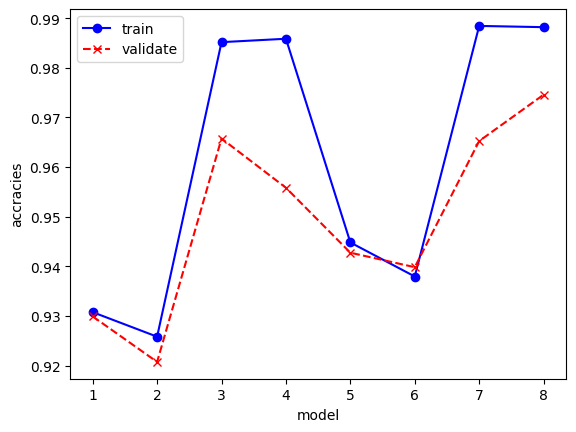

In [ ]:
plt.figure()

# Extract model_accuracies dictionary keys and valuess
model = [m +1 for m in list(model_accuracies.keys())]
train_acc = [value[0] for value in model_accuracies.values()]
valid_acc = [value[1] for value in model_accuracies.values()]

# Creat plots
plt.plot(model, train_acc, label='y1', marker='o', linestyle='-', color='blue')
plt.plot(model, valid_acc, label='y2', marker='x', linestyle='--', color='red')


plt.xlabel('model')
plt.ylabel('accracies')
plt.legend(['train', 'validate'])
plt.show()

 ### Theoretically, are you supposed to see any similarity between these plots?

 By analysing the graph it can see that the model which has the highest train accuracy ,also has the highest validation accuracy regradless the overfitting.

 In here its model 3, 4, and 7, 8


 the  common trait to all these is they all have same activation function.
 Hence right activation plays a big role in accuracy of the model.